In [27]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [28]:
from tensorflow.keras import datasets, layers, models


In [29]:
##getting  the data
(train_imgs, train_lebels), (test_imgs, test_labels) = datasets.cifar10.load_data()

In [30]:
train_lebels

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [31]:
##scale the data, Normalize pixel values to be between 0 and 1
train_images, test_images = train_imgs / 255.0, test_imgs / 255.0

In [8]:
# train_images

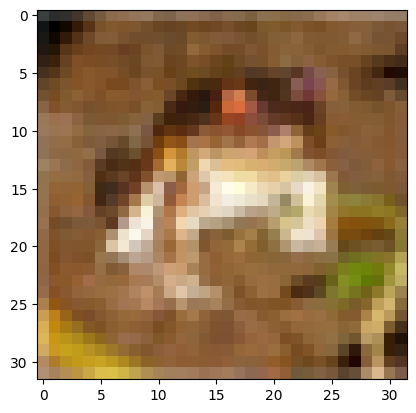

In [32]:
plt.imshow(train_images[0])
plt.show()

#### Model Creation

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [34]:
model=Sequential()

model.add( Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)) )
model.add(MaxPooling2D((2,2)))

model.add( Conv2D(64, (3,3), activation='relu') )
model.add(MaxPooling2D((2,2)))

model.add( Conv2D(64, (3,3), activation='relu') )
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add( Dense(10,  activation='softmax'))

In [35]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 2, 2, 64)         

In [36]:
early_stopping = EarlyStopping(patience=5, monitor='val_loss')


In [37]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [38]:
history = model.fit(train_images, train_lebels, epochs=20,
                    validation_data=(test_images, test_labels), callbacks=[early_stopping])

Epoch 1/20
1563/1563 [==============================] - 9s 5ms/step - loss: 1.5849 - accuracy: 0.4206 - val_loss: 1.2672 - val_accuracy: 0.5422
Epoch 2/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2152 - accuracy: 0.5678 - val_loss: 1.1405 - val_accuracy: 0.6004
Epoch 3/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0606 - accuracy: 0.6289 - val_loss: 1.1176 - val_accuracy: 0.6131
Epoch 4/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9687 - accuracy: 0.6606 - val_loss: 1.0076 - val_accuracy: 0.6472
Epoch 5/20
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9034 - accuracy: 0.6844 - val_loss: 0.9595 - val_accuracy: 0.6760
Epoch 6/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8475 - accuracy: 0.7036 - val_loss: 0.9775 - val_accuracy: 0.6674
Epoch 7/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8035 - accuracy: 0.7167 - val_loss: 0.9183 - val_accuracy:

313/313 - 1s - loss: 0.9712 - accuracy: 0.6977 - 666ms/epoch - 2ms/step


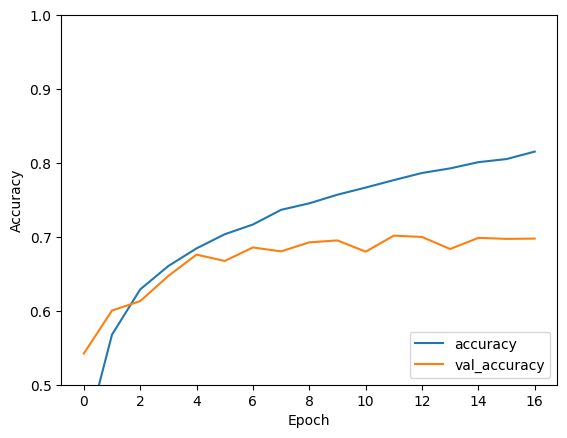

In [39]:
##Evaluate
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [41]:
print(test_acc)

0.697700023651123


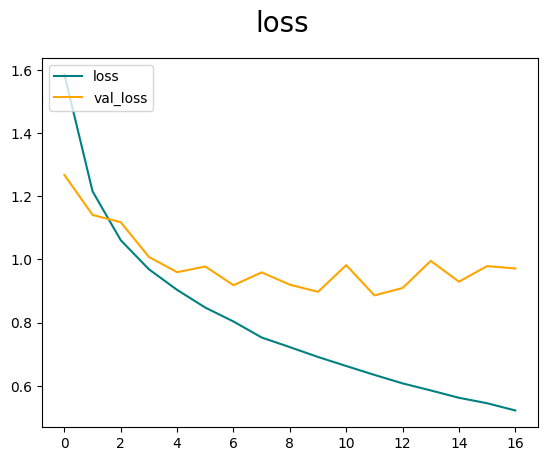

In [40]:
fig=plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

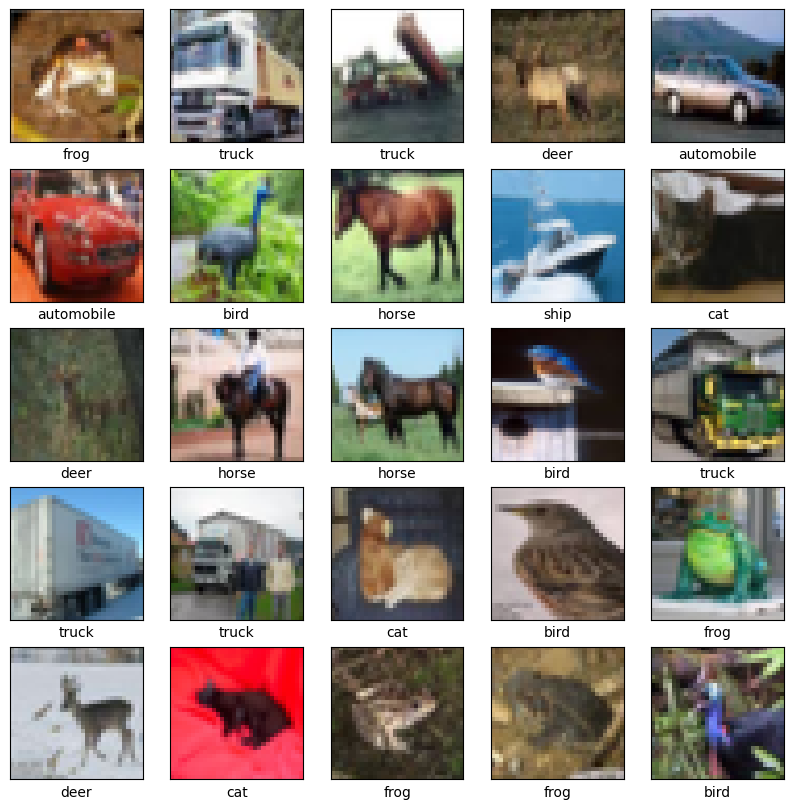

In [43]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_lebels[i][0]])
plt.show()